In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=sns.load_dataset("iris")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=32)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt=DecisionTreeClassifier(max_depth=2)

In [10]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [11]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]')]

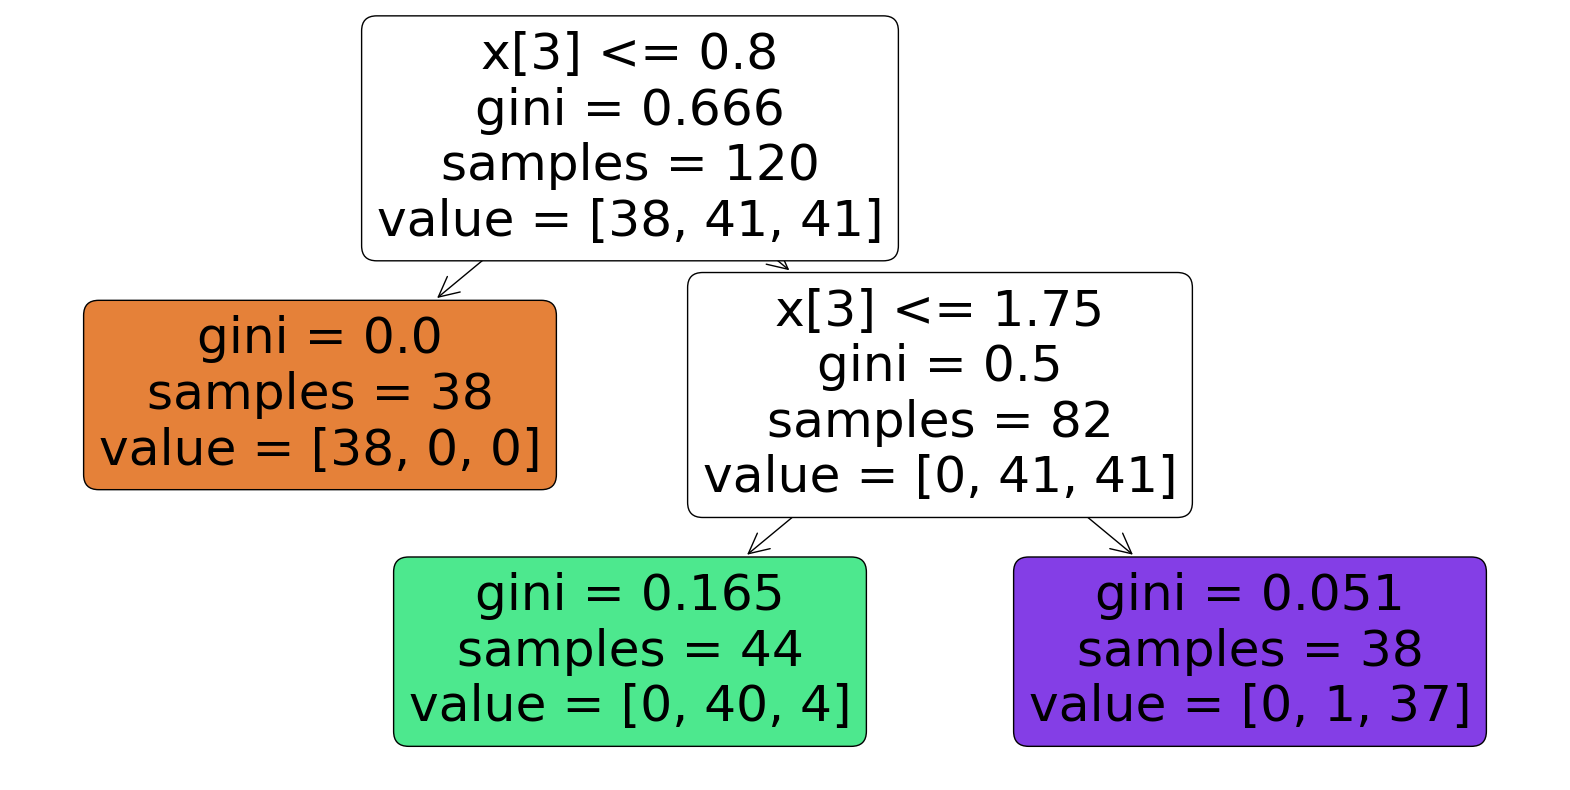

In [12]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt,rounded=True,filled=True)

In [13]:
dt.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
y_pred=dt.predict(x_test)
y_pred

array(['versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [15]:
from sklearn.metrics import accuracy_score,classification_report

In [16]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [18]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2'],
    
}
    

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [20]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring="accuracy")

In [21]:
cv.fit(x_train,y_train)

/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explici

/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explici

/Users/udayladdha/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [22]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'random'}

In [23]:
y_pred=cv.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.9333333333333333